# Softmax

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [69]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [70]:
def optimizar(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    theta = (1/m)*(x_train.T @ (sigma-y_train))
    return theta

In [71]:
def costo(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

In [72]:
def softmax(vector):
	e = np.exp(vector)
	return e / e.sum()

In [73]:
iris = datasets.load_iris()

In [74]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)

In [75]:

for i in range(x.shape[1]):
    max = x[:,i].max()
    min = x[:,i].min()
    x[:,i] = (x[:,i] - min)/(max - min)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [77]:
X_b = np.c_[np.ones((len(x_train),1)), x_train]
x_test = np.c_[np.ones((len(x_test),1)), x_test]

In [78]:
X_b[:10], x_test[:10]

(array([[1.        , 0.61111111, 0.41666667, 0.76271186, 0.70833333],
        [1.        , 0.02777778, 0.41666667, 0.05084746, 0.04166667],
        [1.        , 0.61111111, 0.5       , 0.69491525, 0.79166667],
        [1.        , 0.11111111, 0.5       , 0.10169492, 0.04166667],
        [1.        , 0.47222222, 0.29166667, 0.69491525, 0.625     ],
        [1.        , 0.22222222, 0.75      , 0.08474576, 0.08333333],
        [1.        , 0.30555556, 0.58333333, 0.08474576, 0.125     ],
        [1.        , 0.72222222, 0.45833333, 0.66101695, 0.58333333],
        [1.        , 0.55555556, 0.375     , 0.77966102, 0.70833333],
        [1.        , 0.19444444, 0.58333333, 0.08474576, 0.04166667]]),
 array([[1.        , 0.33333333, 0.625     , 0.05084746, 0.04166667],
        [1.        , 0.19444444, 0.        , 0.42372881, 0.375     ],
        [1.        , 0.38888889, 0.20833333, 0.6779661 , 0.79166667],
        [1.        , 0.38888889, 0.41666667, 0.54237288, 0.45833333],
        [1.       

In [79]:
y_train[:10], y_test[:10]

(array([[2],
        [0],
        [2],
        [0],
        [1],
        [0],
        [0],
        [1],
        [2],
        [0]]),
 array([[0],
        [1],
        [2],
        [1],
        [1],
        [2],
        [0],
        [0],
        [1],
        [0]]))

In [80]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [81]:
theta_setosa = np.random.randn(5).reshape(5,1)
theta_setosa

array([[0.61891522],
       [0.35182004],
       [1.81756122],
       [0.67135236],
       [1.06668804]])

In [82]:
eta = 0.8
n_iter = 10000

J_set = np.zeros(n_iter)
m = len(x_train)
y_train_set = (y_train == 0).astype(int)
for i in range(n_iter):
    J_set[i] = -(1/m)*costo(theta_setosa, X_b, y_train_set)
    theta_setosa = theta_setosa - eta * optimizar(theta_setosa, X_b, y_train_set)
theta_setosa

array([[  4.21306683],
       [ -5.42760448],
       [  8.92354367],
       [-11.54660069],
       [-10.63461185]])

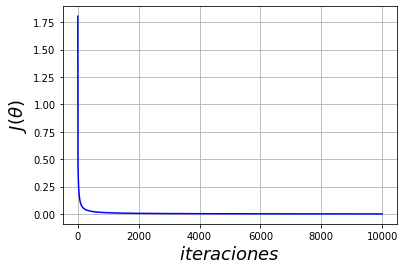

In [83]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [107]:
y_proba_set =theta_setosa.T @ x_test.T
y_proba_set

array([[  6.95085601,  -5.72290756, -12.28586822,  -5.31628524,
         -8.75999079, -11.36491758,   7.70266242,   8.55333233,
         -5.41292218,   6.46017865,   6.91510925,   7.04729394,
        -14.43227504,   7.26158114,  -6.78042663, -12.74161358,
        -10.60513806, -12.02434115, -11.44560264,  -8.70707372,
        -14.7419864 , -14.38854951,   6.42908966, -13.65520121,
        -14.47295925, -12.65497729,  -6.72407023,   7.35821808,
         -7.08074744, -13.50902283,  -9.65810524,  -4.54738919,
         -5.9769966 , -16.86575603, -14.19163164,   6.79069866,
          8.71802345,  -3.4791861 ]])

In [85]:
theta_versicolor = np.random.randn(5).reshape(5,1)
theta_versicolor

array([[ 0.04622688],
       [ 0.47182128],
       [ 0.12837245],
       [ 0.7070451 ],
       [-1.94510933]])

In [86]:
eta = 0.8
n_iter = 10000

J_vers = np.zeros(n_iter)

y_train_ver = (y_train == 1).astype(int)
for i in range(n_iter):
    J_vers[i] = -(1/m)*costo(theta_versicolor, X_b, y_train_ver)
    theta_versicolor = theta_versicolor - eta * optimizar(theta_versicolor, X_b, y_train_ver)
theta_versicolor

array([[ 1.79134026],
       [ 1.30907494],
       [-7.47626141],
       [ 4.93068139],
       [-5.31607415]])

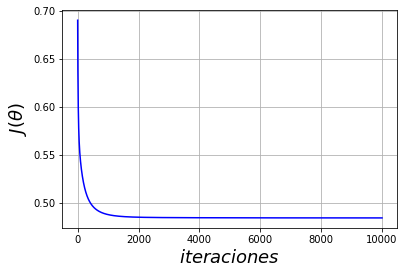

In [87]:
plt.plot(np.arange(n_iter), J_vers, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [104]:
y_proba_ver = theta_versicolor.T @ x_test.T
y_proba_ver

array([[-2.41575529,  2.14162658, -0.12285336, -0.57695008, -0.77148395,
        -0.16826068, -4.14116823, -3.94779104, -0.91838723, -1.85736152,
        -2.69914028, -2.10807413, -1.81580592, -2.81907434, -1.09983631,
        -0.0191171 , -0.65226663, -1.22236054, -0.404438  , -1.95483879,
        -0.64068838, -2.66856808, -1.32983871, -1.81414342,  1.35235171,
        -2.46268392,  0.09971632, -2.47763719, -0.22155544, -2.20251253,
         1.76744398,  0.52710357, -0.51795216,  0.12612369, -1.94658447,
        -2.08255542, -5.42249137, -0.01892214]])

In [89]:
theta_virginica = np.random.randn(5).reshape(5,1)
theta_virginica

array([[ 1.65652618],
       [ 0.8485213 ],
       [ 0.34097995],
       [ 0.00944632],
       [-0.37664114]])

In [90]:
eta = 0.8
n_iter = 10000

J_vir = np.zeros(n_iter)

y_train_vir = (y_train == 2).astype(int)
for i in range(n_iter):
    J_vir[i] = -(1/m)*costo(theta_virginica, X_b, y_train_vir)
    theta_virginica = theta_virginica - eta * optimizar(theta_virginica, X_b, y_train_vir)
theta_virginica

array([[-21.62079808],
       [ -3.51594153],
       [ -4.98304861],
       [ 17.84876777],
       [ 21.37446859]])

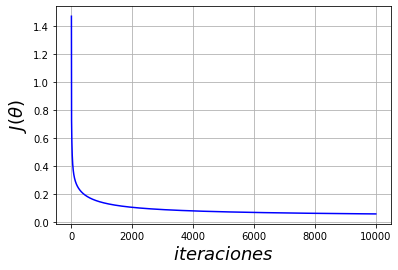

In [91]:
plt.plot(np.arange(n_iter), J_vir, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [102]:
y_proba_vir = theta_virginica.T @ x_test.T
y_proba_vir

array([[-24.10901665,  -6.72599047,   4.99607   ,  -5.58705989,
         -2.58692133,   1.91109849, -23.060654  , -25.74266839,
         -4.90131348, -21.4026054 , -22.52523214, -22.31016987,
          7.86286732, -22.73008858,  -1.71469173,   3.91412226,
          0.30947587,   3.78165751,   3.89506954,   0.96110205,
          6.20392052,  10.22729271, -21.79448019,   6.258136  ,
          4.65838576,   6.43839856,  -3.97591091, -23.41583499,
         -4.67463373,   4.38358856,  -3.22401514,  -8.65540792,
         -3.60221235,   7.83324572,   7.1601593 , -22.90568648,
        -23.78674128,  -8.48379522]])

In [108]:
compar = np.concatenate((y_proba_set, y_proba_ver, y_proba_vir), axis =0).T
compar

array([[ 6.95085601e+00, -2.41575529e+00, -2.41090167e+01],
       [-5.72290756e+00,  2.14162658e+00, -6.72599047e+00],
       [-1.22858682e+01, -1.22853364e-01,  4.99607000e+00],
       [-5.31628524e+00, -5.76950077e-01, -5.58705989e+00],
       [-8.75999079e+00, -7.71483954e-01, -2.58692133e+00],
       [-1.13649176e+01, -1.68260683e-01,  1.91109849e+00],
       [ 7.70266242e+00, -4.14116823e+00, -2.30606540e+01],
       [ 8.55333233e+00, -3.94779104e+00, -2.57426684e+01],
       [-5.41292218e+00, -9.18387230e-01, -4.90131348e+00],
       [ 6.46017865e+00, -1.85736152e+00, -2.14026054e+01],
       [ 6.91510925e+00, -2.69914028e+00, -2.25252321e+01],
       [ 7.04729394e+00, -2.10807413e+00, -2.23101699e+01],
       [-1.44322750e+01, -1.81580592e+00,  7.86286732e+00],
       [ 7.26158114e+00, -2.81907434e+00, -2.27300886e+01],
       [-6.78042663e+00, -1.09983631e+00, -1.71469173e+00],
       [-1.27416136e+01, -1.91170960e-02,  3.91412226e+00],
       [-1.06051381e+01, -6.52266628e-01

In [121]:
prediction_final = []
for i in range(len(compar)):
    prediction_final.append(softmax(compar[i]))
prediction_final = np.round(np.array(prediction_final), 3)
prediction_final

array([[1.   , 0.   , 0.   ],
       [0.   , 0.999, 0.   ],
       [0.   , 0.006, 0.994],
       [0.009, 0.985, 0.007],
       [0.   , 0.86 , 0.14 ],
       [0.   , 0.111, 0.889],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.011, 0.971, 0.018],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.002, 0.648, 0.35 ],
       [0.   , 0.019, 0.981],
       [0.   , 0.277, 0.723],
       [0.   , 0.007, 0.993],
       [0.   , 0.013, 0.987],
       [0.   , 0.051, 0.949],
       [0.   , 0.001, 0.999],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.035, 0.965],
       [0.   , 0.   , 1.   ],
       [0.001, 0.982, 0.017],
       [1.   , 0.   , 0.   ],
       [0.001, 0.987, 0.011],
       [0.   , 0.001, 0.999],
       [0.   , 0.993, 0.007],
       [0.006, 0.994, 0.   ],
       [0.004, 0.952, 0.044],
       [0.

In [123]:
y_pred = np.zeros(len(prediction_final)).reshape(len(prediction_final),1)
for i in range(len(prediction_final)):
    value_class = prediction_final[i].argmax()
    y_pred[i] = value_class
y_pred

array([[0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [1.]])

In [111]:
np.concatenate((y_pred, y_test), axis = 1)

array([[0., 0.],
       [1., 1.],
       [2., 2.],
       [1., 1.],
       [1., 1.],
       [2., 2.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [2., 2.],
       [0., 0.],
       [1., 1.],
       [2., 2.],
       [2., 1.],
       [2., 2.],
       [2., 2.],
       [2., 1.],
       [2., 2.],
       [2., 2.],
       [0., 0.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [2., 2.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [0., 0.],
       [0., 0.],
       [1., 1.]])

In [97]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 14]], dtype=int64)

In [98]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

0.9473684210526315

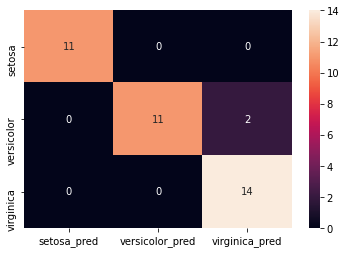

In [99]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
f = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [100]:
print(classification_report(y_test,  y_pred, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.88      1.00      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

